Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv("C:/Users/agnis/Downloads/50_Startups.csv")

In [41]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [42]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [43]:
data.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

In [44]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [45]:
data.isnull().sum().sort_values(ascending=False)

Profit             0
State              0
Marketing Spend    0
Administration     0
R&D Spend          0
dtype: int64

In [46]:
X = data.iloc[:,:-1].values
y = data.iloc[:,4:5].values

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])
onehotencoder = OneHotEncoder(categorical_features = [3])
#onehotencoder = OneHotEncoder(categories='auto')
X = onehotencoder.fit_transform(X).toarray()

C:\Users\agnis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\agnis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [48]:
data = pd.get_dummies(data,columns=['State'])

In [49]:
X = X[:,1:]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)  

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred = regressor.predict(X_test)

In [53]:
y_pred

array([[103015.20159796],
       [132582.27760816],
       [132447.73845175],
       [ 71976.09851259],
       [178537.48221054],
       [116161.24230163],
       [ 67851.69209676],
       [ 98791.73374688],
       [113969.43533012],
       [167921.0656955 ]])

In [54]:
y_test

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94]])

In [55]:
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sb

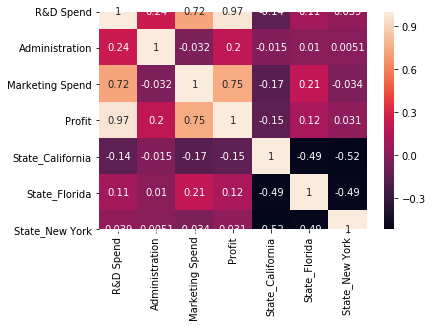

In [56]:
sb.heatmap(data.corr(),annot=True)

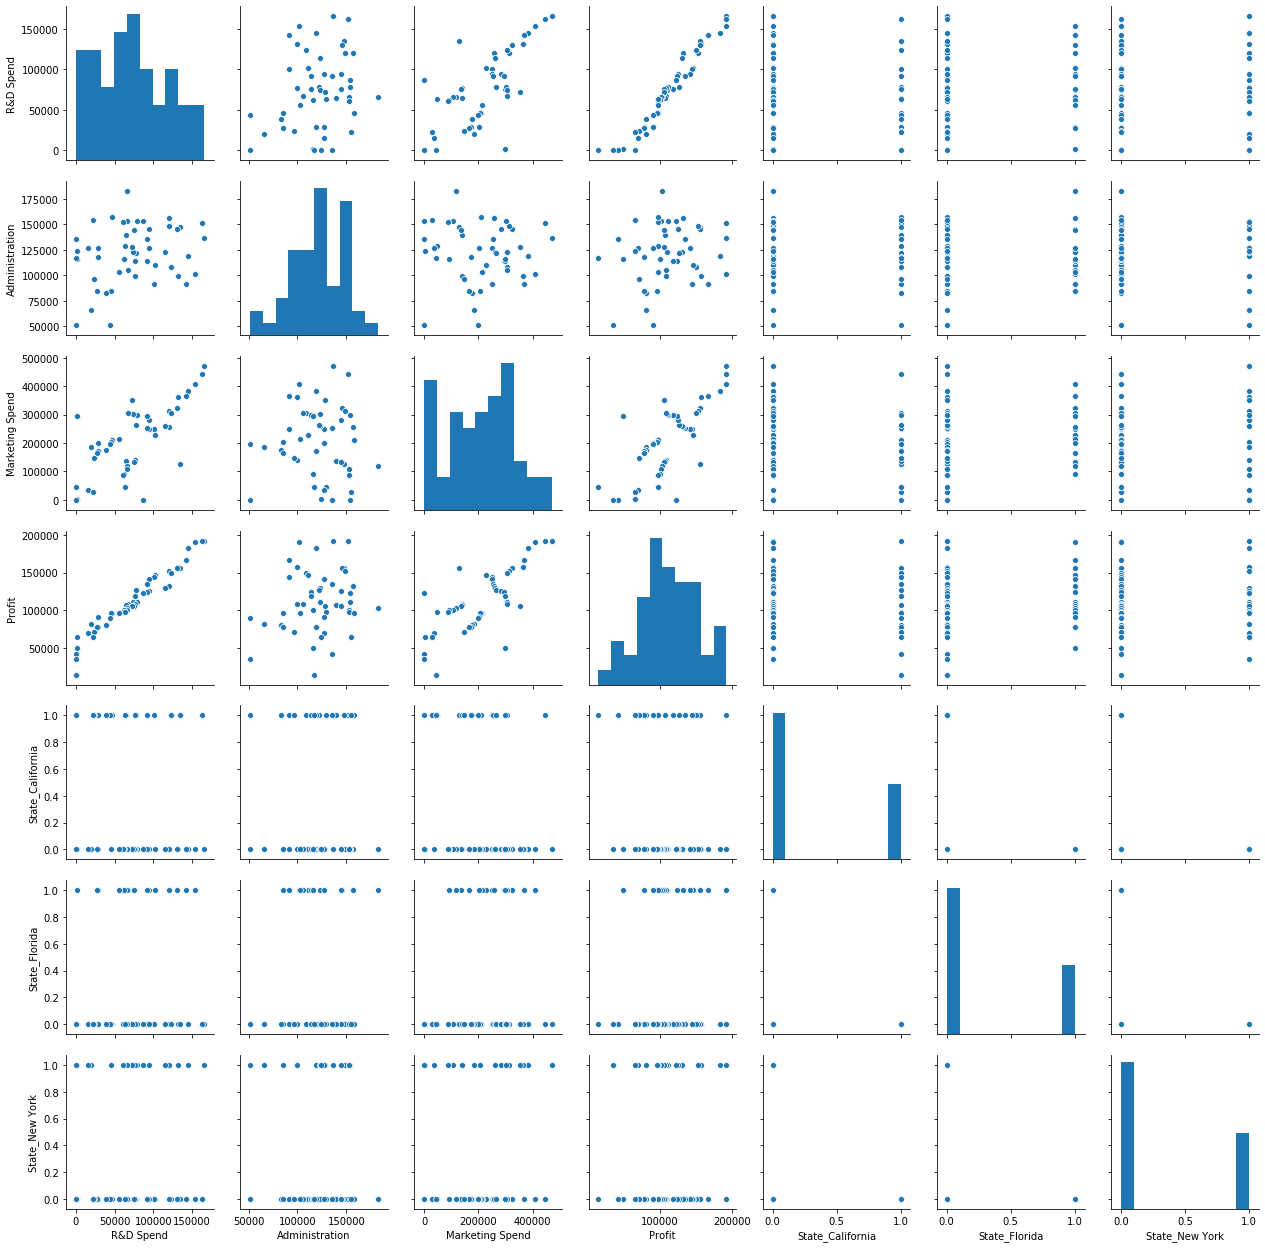

In [57]:
sb.pairplot(data)

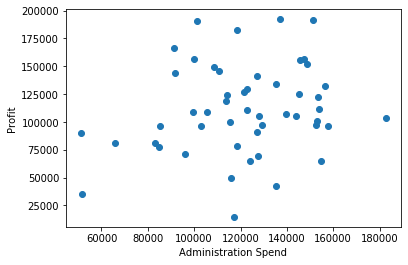

In [58]:
plt.scatter(data.Administration,data.Profit)
plt.xlabel('Administration Spend')
plt.ylabel('Profit')
plt.show()



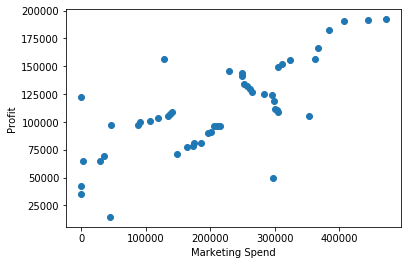

In [59]:
plt.scatter(data[['Marketing Spend']],data.Profit)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

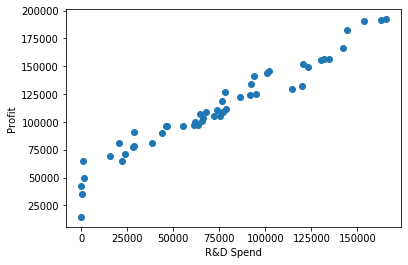

In [60]:
plt.scatter(data[['R&D Spend']],data.Profit)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

In [61]:
#### A model with only Marketing Spend and R&D Spend as features


x1 = data[['Marketing Spend','R&D Spend']]
y1 = data.Profit
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1)
model1 = LinearRegression()

In [62]:
model1.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_predict1 = model1.predict(x_test1)

In [72]:
model1.score(x_test1,y_test1)

0.9580056158753257

In [64]:
print('R2 VALUE'+ str(r2_score(y_test1,y_predict1)))

R2 VALUE0.9580056158753257


In [65]:
print('ROOT MEAN SQUARED ERROR '+str(np.sqrt(mean_squared_error(y_test1,y_predict1))))

ROOT MEAN SQUARED ERROR 7616.325558157452


In [66]:

#A model with all three features

x2 = data[['Administration','R&D Spend','Marketing Spend']]
y2 = data.Profit
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2)
model2 = LinearRegression()
model2.fit(x_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_predict2 = model2.predict(x_test2)

In [73]:
model2.score(x_test2,y_test2)

0.9286039344756605

In [68]:
print('R2 VALUE '+str(r2_score(y_test2,y_predict2)))

R2 VALUE 0.9286039344756605


In [69]:
print('ROOT MEAN SQUARED ERROR '+str(np.sqrt(mean_squared_error(y_test2,y_predict2))))

ROOT MEAN SQUARED ERROR 9839.502773561284


In [70]:
#Conclusion as from heatmap,scatterplot,R2,RMSE Profit and Administration spends are less correlated 
#we can ignore Administration Spend feature.

#Also model1 earns more profit